# An example Jupyter Notebook

This notebook is a demonstration of directly-parsing Jupyter Notebooks into
Sphinx using the MyST parser.

```{warn}
This is currently an **alpha feature** that may behave in unexpected ways,
or change in the near future.
```

## Markdown

As you can see, markdown is parsed as expected. Embedding images should work as expected.
For example, here's the MyST logo:

![](_static/logo.png)

## Running cells

You can run cells, and the cell outputs will be captured and inserted into
the resulting Sphinx site. For example, here's some simple Python:

In [23]:
import numpy as np
data = np.random.rand(3, 100) * 100
data[:, :10]

array([[35.85238892, 31.51261625, 27.30331219, 51.68745535, 72.33367438,
         0.10877365, 93.6296751 ,  4.94502736, 19.2627326 , 63.15207065],
       [25.26427953, 11.99138215, 57.98350439, 79.05336444, 99.12140912,
        24.75625301, 43.82591898, 42.58382346, 61.58725246, 33.15407415],
       [49.92291296, 94.17189862, 19.35474315, 79.96783005, 75.9230726 ,
        43.69704506,  1.57662474, 54.85292708, 27.97165168, 27.11030721]])

This will also work with HTML outputs

In [25]:
import pandas as pd
df = pd.DataFrame(data.T, columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,35.852389,25.264280,49.922913
1,31.512616,11.991382,94.171899
2,27.303312,57.983504,19.354743
3,51.687455,79.053364,79.967830
4,72.333674,99.121409,75.923073


## Images

Images that are generated from your code (e.g., with Matplotlib) will also
be embedded.

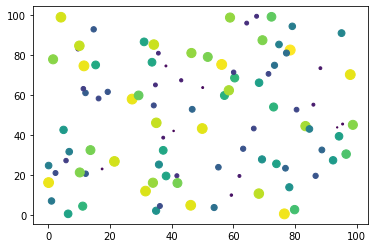

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(*data, c=data[2])

## Interactive outputs

Interactive outputs will work under the assumption that the outputs they produce have
self-contained HTML that works without requiring any external dependencies to load.
For example, the `Altair` "html" output works well:

In [30]:
import altair as alt
alt.Chart(data=df).mark_point().encode(
    x='a',
    y='b',
    color='c',
    size='c'
)

alt.Chart(...)

## The IPywidget ecosystem

You may also run code for Jupyter Widget in your document, and the interactive HTML
outputs will embed themselves in your side.

Here is an example from ipyvolume:

In [31]:
import ipywidgets as widgets
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)




IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [32]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab
